In [2]:
from generator import gaussian_noise_generator
from generator import sphere_point_generator
from generator import gaussian_point_generator
from functions import noisy_function
from functions import sphere_function
from functions import quadratic
import algorithms as alg
from functions import compute_L
import numpy as np
from utilities import plot_real_values
import matplotlib.pyplot as plt

In [5]:
sigma = 1e-2
noise_G = gaussian_noise_generator(sigma)
#func = lambda x, order=0: sphere_function(x, 2, order)
H = np.matrix('10 0; 0 40');
# the vector of linear coefficient of the quadratic function
b = np.matrix('0; 0')
func = lambda x, order=0: quadratic( H, b, x, order )
noisy_func = lambda x, n: noisy_function(func, x, noise_G, n, noise_mode="multiply")
initial_x = np.matrix('100;100')
N = 10000
m = 100
t = 1e-4
n = initial_x.shape[0]
L = compute_L(func, n)
direction_G1 = sphere_point_generator(n)
direction_G2 = gaussian_point_generator(n)

In [6]:
x0, xs0 = alg.rdfds(noisy_func, initial_x, L, m, t, N, feedback = 2, direction_generator = direction_G1)
x1, xs1 = alg.rsgf(noisy_func, initial_x, L, m, t, N, feedback = 2, direction_generator = direction_G1, two_phase = True)
x2, xs2 = alg.rg(noisy_func, initial_x, L, m, t, N, feedback = 1, direction_generator = direction_G2)

/Users/sunxiaofei/workspace/CSE-592-Project/Code/algorithms.py:22: RuntimeWarning: invalid value encountered in subtract
  gradient = ((f_te - f)/t).mean() * direction


In [22]:
def get_real_values(real_func, xs):
    values = np.array(list(map(lambda x: real_func(x)[0,0], xs)))
    return values

In [23]:
ys0=get_real_values(func, xs0)
ys1=get_real_values(func, xs1)
ys2=get_real_values(func, xs2)

In [24]:
len(ys)

array([  2.50000000e+05,   2.46631688e+05,   2.46426578e+05, ...,
         2.51523582e-09,   2.17174090e-09,   1.01419503e-08])

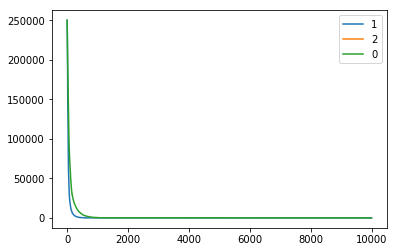

In [11]:
fig = plt.figure()
plt.legend()
plt.show()